In [78]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Importing the database
data = pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [80]:
# Unnecessary column removal
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [82]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [83]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['year'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['Date', 'type', 'region']}

In [84]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].apply(lambda x:x.day)
data['Month']=  data['Date'].apply(lambda x:x.month)

In [85]:
data = data.drop(['Date'], axis = 1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [86]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [87]:
data.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [88]:
data.groupby('Month')['AveragePrice'].mean()

Month
1     1.311019
2     1.274387
3     1.332255
4     1.374380
5     1.346601
6     1.408964
7     1.462077
8     1.512514
9     1.572654
10    1.579683
11    1.455563
12    1.331112
Name: AveragePrice, dtype: float64

In [89]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,31.000000,12.000000


In [90]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Day              0.014310
Month            0.106617
dtype: float64

In [91]:
# Encoding the categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
data['type']= le.fit_transform(data['type'])

In [93]:
data['region']= le.fit_transform(data['region'])

In [94]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14,1


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

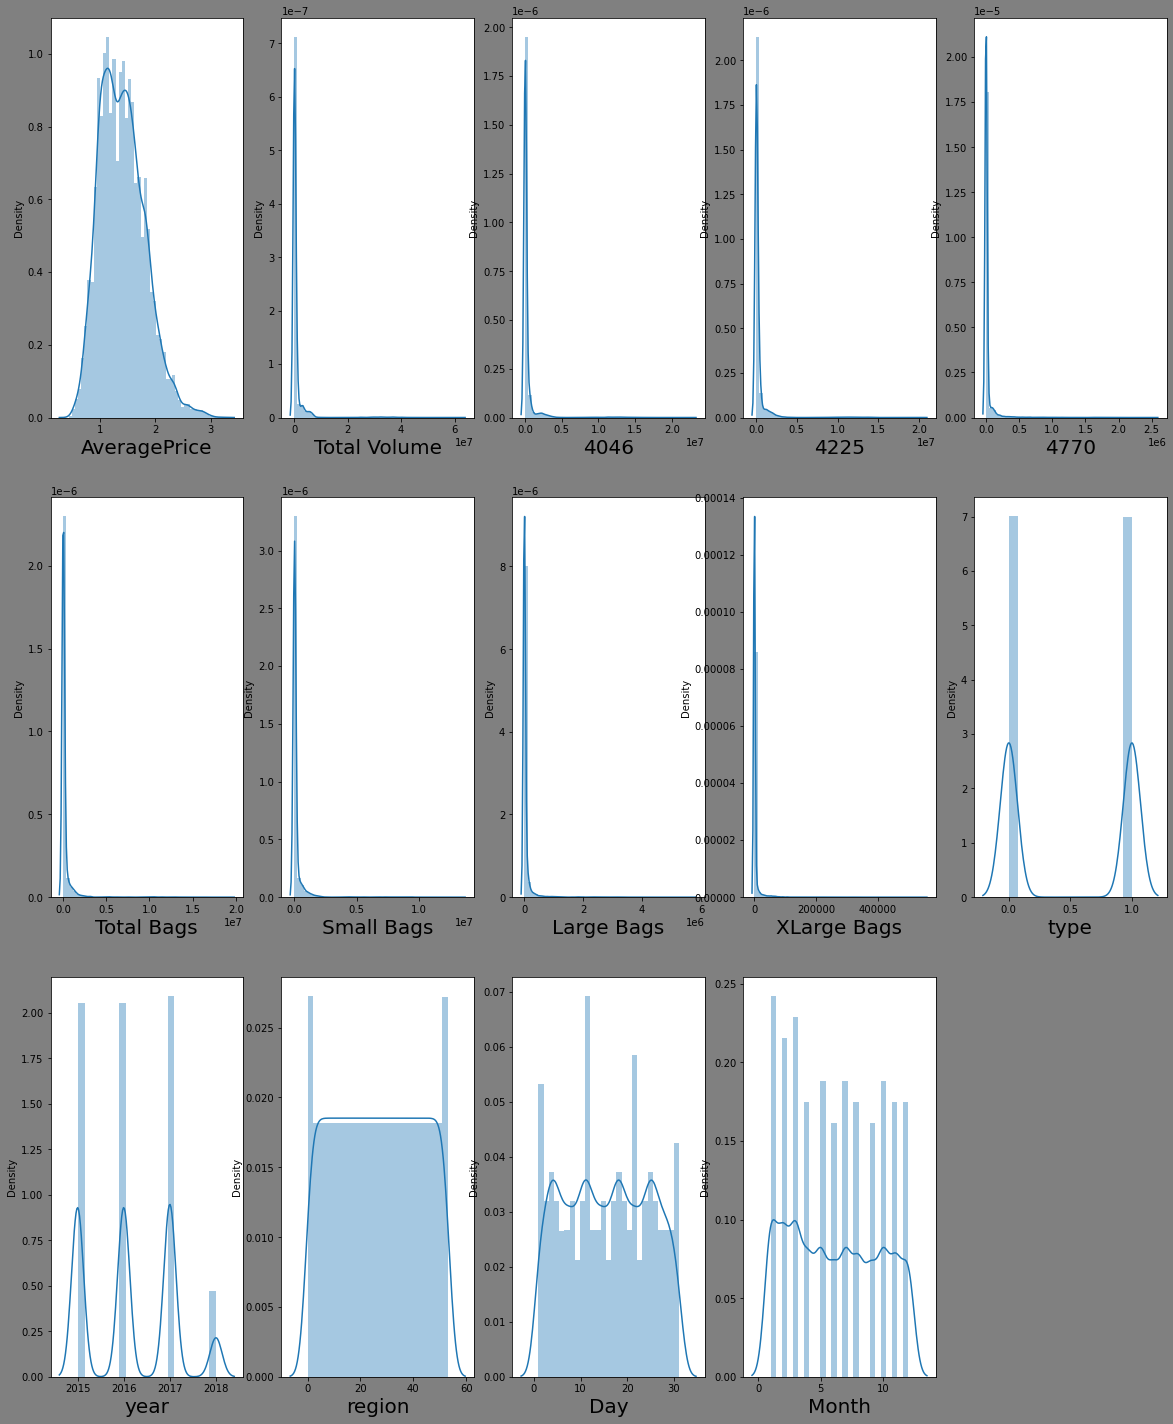

In [96]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber = 1
for column in data:
    if plotnumber <15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [97]:
# Treating the skewness.
data_skew = ('Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')

for i in data_skew:
    if data.skew().loc[i]>0.55:
        data[i] = np.log1p(data[i])

In [98]:
data.shape

(18249, 14)

In [99]:
data.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Day             0.014310
Month           0.106617
dtype: float64

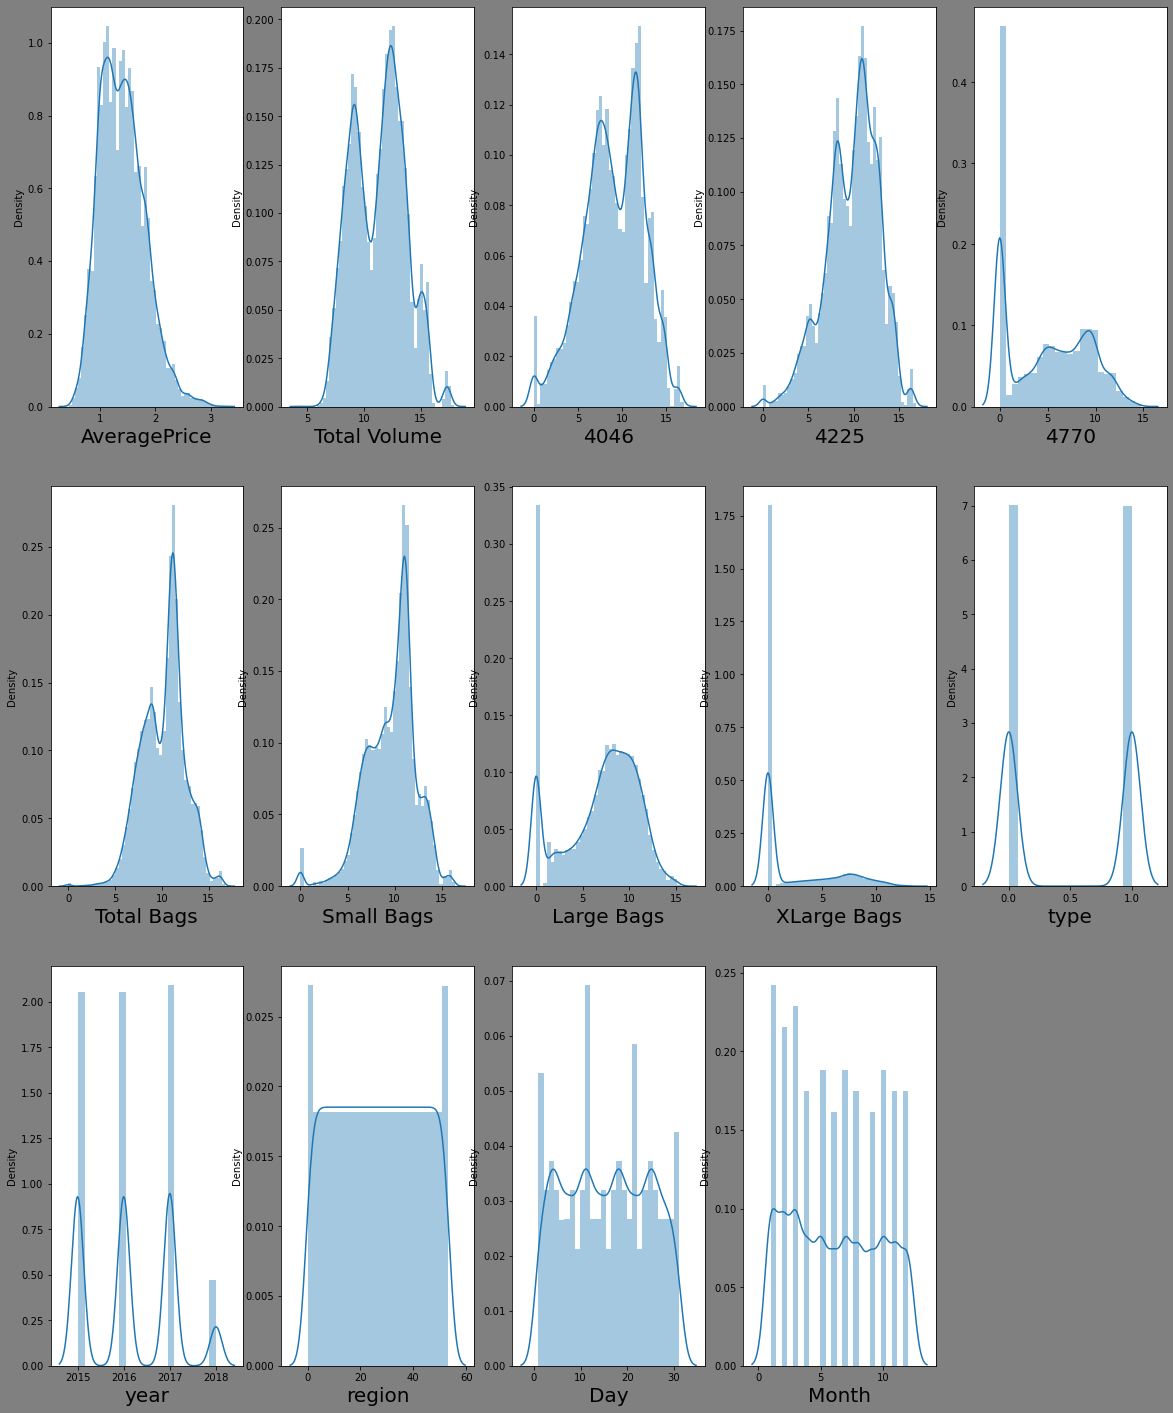

In [100]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber = 1
for column in data:
    if plotnumber <15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

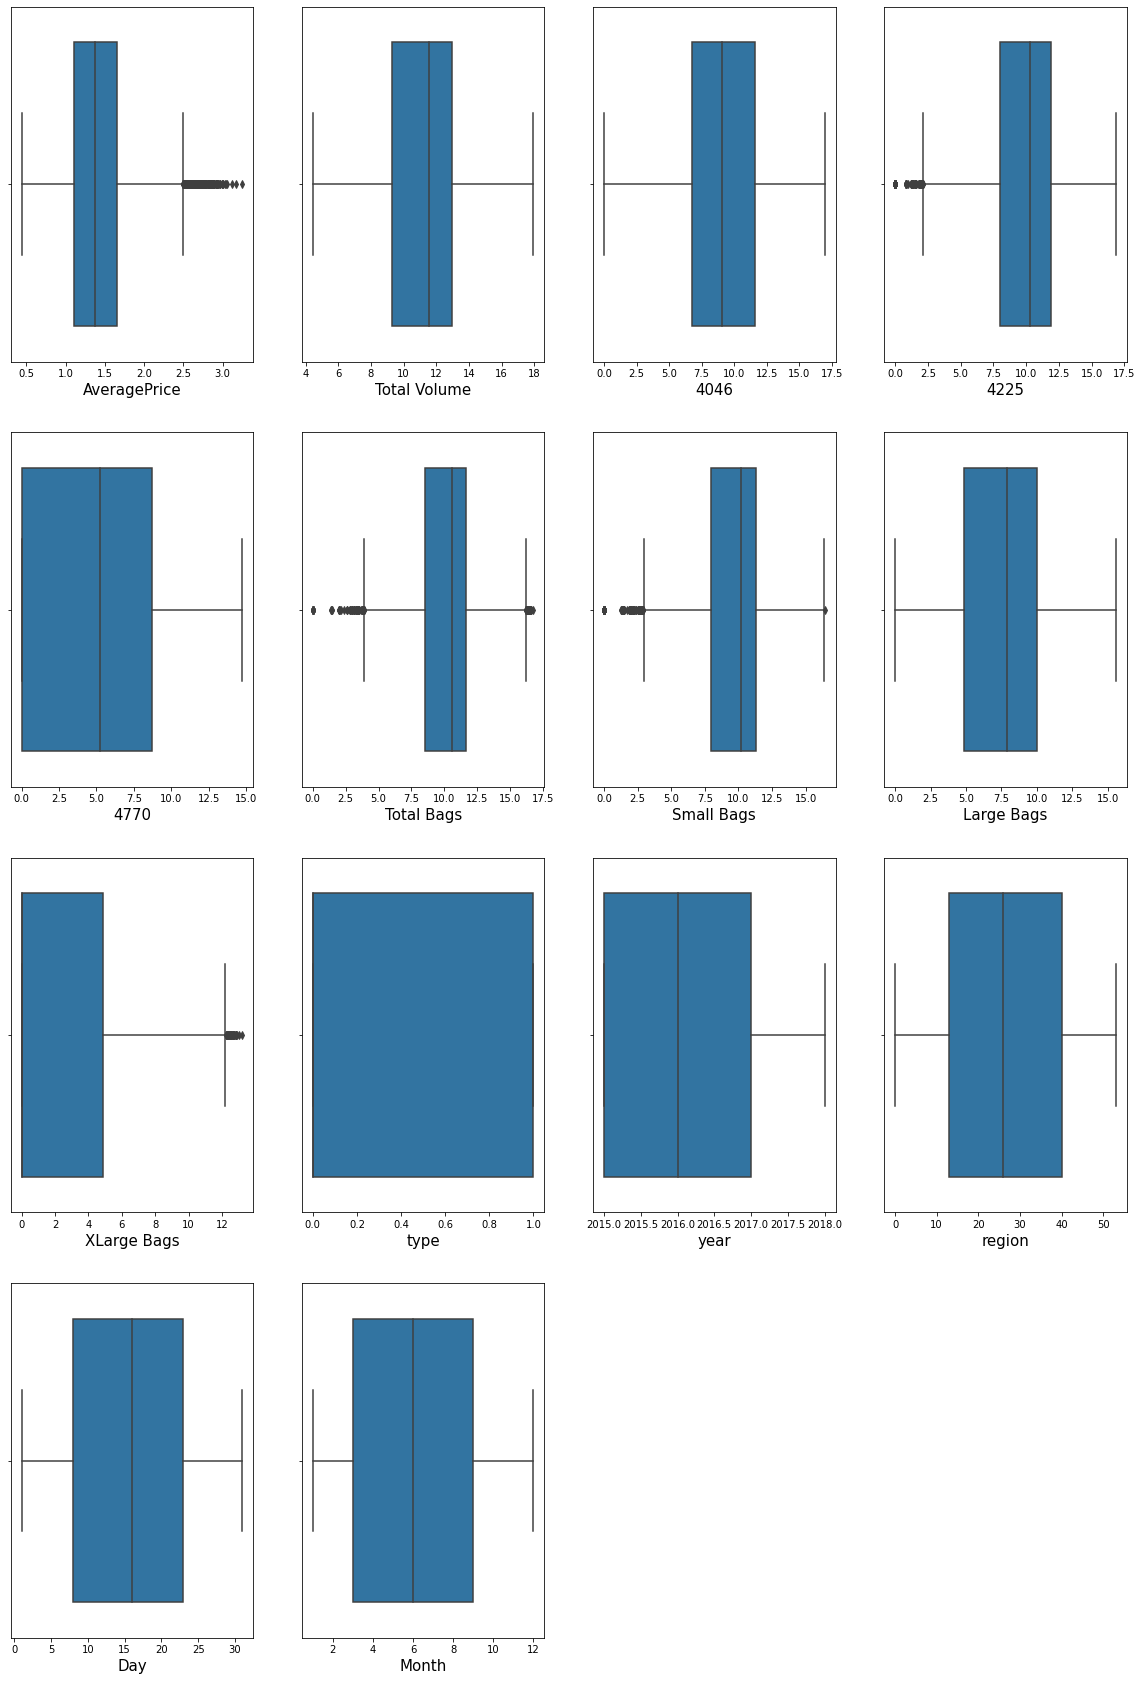

In [101]:
# finding the outliers.

plt.figure(figsize=(20,30))
graph = 1

for column in data:
    if graph<=16:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [102]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
         9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
         9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
         9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
        10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
        10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
        10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
        11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
        11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
        11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
        11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11320,
        11321, 11321, 11321, 11322, 11323, 11324, 11324, 11325, 11325,
        11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
        11330, 11331, 11331, 11332, 11332, 11333, 11333, 11334, 11335,
      

In [103]:
data_new_z = data[(z<3).all(axis=1)]
data_new_z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,27,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,20,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,13,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,4,2
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,28,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,21,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,14,1


<AxesSubplot:>

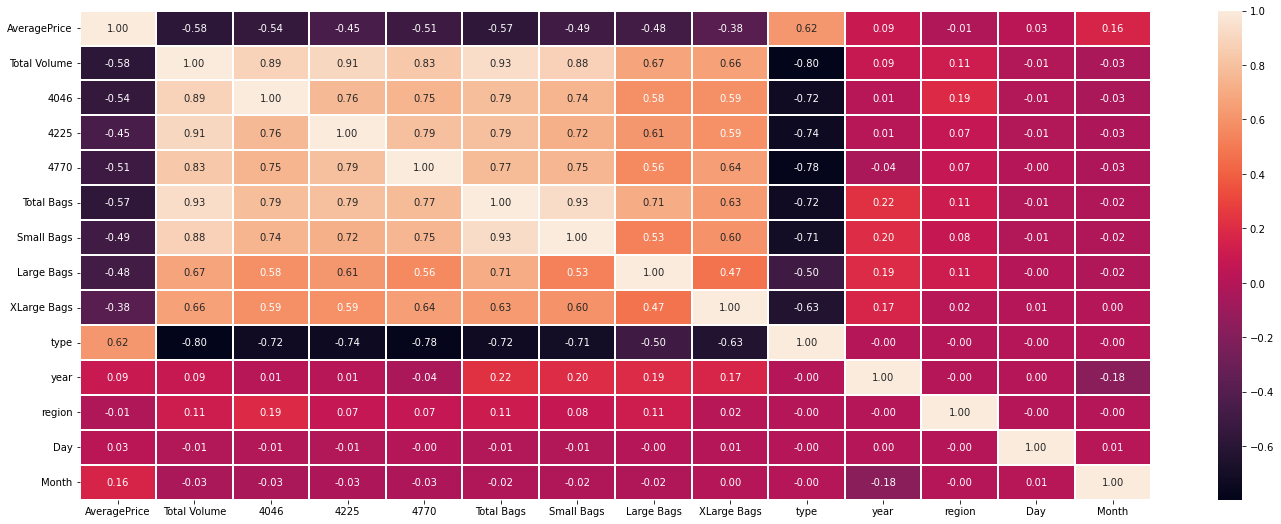

In [104]:
# Checking Corelation.

plt.figure(figsize=(24,9))
sns.heatmap(data.corr(),annot=True,linewidth=0.1, fmt ="0.2f")  

In [105]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
AveragePrice,1.000000,-0.583411,-0.543861,-0.446584,-0.507234,-0.574931,-0.493520,-0.478741,-0.379680,0.615845,0.093197,-0.011716,0.027386,0.162409
Total Volume,-0.583411,1.000000,0.886538,0.908610,0.834274,0.934924,0.876670,0.671429,0.661647,-0.796481,0.086274,0.111673,-0.010493,-0.034262
4046,-0.543861,0.886538,1.000000,0.761893,0.747167,0.785653,0.741634,0.582992,0.585774,-0.720788,0.011078,0.191000,-0.007349,-0.033224
4225,-0.446584,0.908610,0.761893,1.000000,0.794104,0.790640,0.722492,0.614586,0.589352,-0.735619,0.014321,0.072366,-0.008917,-0.030705
4770,-0.507234,0.834274,0.747167,0.794104,1.000000,0.773176,0.747692,0.558938,0.643214,-0.782055,-0.040618,0.071842,-0.002803,-0.025808
Total Bags,-0.574931,0.934924,0.785653,0.790640,0.773176,1.000000,0.929040,0.709648,0.633930,-0.724031,0.222446,0.105552,-0.008874,-0.022617
Small Bags,-0.493520,0.876670,0.741634,0.722492,0.747692,0.929040,1.000000,0.526174,0.599928,-0.708089,0.202987,0.078192,-0.006399,-0.017234
Large Bags,-0.478741,0.671429,0.582992,0.614586,0.558938,0.709648,0.526174,1.000000,0.469564,-0.499925,0.193857,0.113016,-0.003034,-0.020540
XLarge Bags,-0.379680,0.661647,0.585774,0.589352,0.643214,0.633930,0.599928,0.469564,1.000000,-0.629273,0.168146,0.016701,0.005218,0.001257
type,0.615845,-0.796481,-0.720788,-0.735619,-0.782055,-0.724031,-0.708089,-0.499925,-0.629273,1.000000,-0.000032,-0.000280,-0.000013,-0.000085


In [106]:
# Seperating the columns into features and targets

x = data.drop('AveragePrice', axis=1)
y = data['AveragePrice']

In [107]:
# Scaling the data using Min-Max Scalar

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [108]:
mms = MinMaxScaler()
lr = LinearRegression()

In [109]:
for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)        
    print( "At random state", {i}, "the training accuracy is :", {r2_score(y_train, pred_train)})
    print( "At random state", {i}, "the training accuracy is :", {r2_score(y_test, pred_test)})
    print("\n")

At random state {0} the training accuracy is : {0.559182504270249}
At random state {0} the training accuracy is : {0.5596735885510316}


At random state {1} the training accuracy is : {0.5580667844939677}
At random state {1} the training accuracy is : {0.5648438769418818}


At random state {2} the training accuracy is : {0.5614831742024338}
At random state {2} the training accuracy is : {0.5508310536043233}


At random state {3} the training accuracy is : {0.5580964513157098}
At random state {3} the training accuracy is : {0.5649161563997616}


At random state {4} the training accuracy is : {0.5622538467289372}
At random state {4} the training accuracy is : {0.5479674936724074}


At random state {5} the training accuracy is : {0.5594048923658219}
At random state {5} the training accuracy is : {0.5584698666800785}


At random state {6} the training accuracy is : {0.5591066708019027}
At random state {6} the training accuracy is : {0.5604854376248598}


At random state {7} the training ac

At random state {64} the training accuracy is : {0.539872537261699}


At random state {65} the training accuracy is : {0.5646348768626561}
At random state {65} the training accuracy is : {0.5366761902527801}


At random state {66} the training accuracy is : {0.5600764826491074}
At random state {66} the training accuracy is : {0.5563088136147509}


At random state {67} the training accuracy is : {0.5584238428680186}
At random state {67} the training accuracy is : {0.5634274191572772}


At random state {68} the training accuracy is : {0.5601249717321185}
At random state {68} the training accuracy is : {0.5565623784883283}


At random state {69} the training accuracy is : {0.5597855997561305}
At random state {69} the training accuracy is : {0.5576043662141712}


At random state {70} the training accuracy is : {0.558152153145299}
At random state {70} the training accuracy is : {0.5640588774623644}


At random state {71} the training accuracy is : {0.5587647120158669}
At random state {71} t

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 15)

In [111]:
lr.fit(x_train, y_train)

LinearRegression()

In [112]:
pred_test= lr.predict(x_test)

In [113]:
print(r2_score(y_test, pred_test))

0.5476782596914953


In [114]:
# Cross Validation

from sklearn.model_selection import cross_val_score

In [115]:
Train_accuracy = r2_score(y_train, pred_train)
Test_accuracy = r2_score(y_test, pred_test)

In [116]:
for j in range(2, 10):
    cv_score = cross_val_score(lr,x, y, cv=j)
    cv_mean = cv_score.mean()
    print('At cross fold', {j}, 'cv score is',{cv_mean}, 'training accuracy score is', {Train_accuracy}, ' and testing is',{Test_accuracy})
    print('\n')

At cross fold {2} cv score is {-1.6162182276153239} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {3} cv score is {0.2247270085802665} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {4} cv score is {0.12399507641167312} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {5} cv score is {0.21062791988367868} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {6} cv score is {0.10460879069531354} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {7} cv score is {0.1475955748040255} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {8} cv score is {0.11054147643919461} training accuracy score is {-0.576668436243392}  and testing is {0.5476782596914953}


At cross fold {9} cv score is